<h1>CNN for to detect brain tumors using MRI images</h1>

<h3>Этап 1</h3> Разделение данных

In [2]:
# Импорт необходимых библиотек
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import array_to_img

In [3]:
# Определяем пути к директориям и категории данных
DATA_DIR = "data/raw"
TRAIN_DIR = "data/train"
VAL_DIR = "data/val"
TEST_DIR = "data/test"
categories = ["yes", "no"]


In [4]:
# Создание необходимых директорий
for dir_path in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    os.makedirs(dir_path, exist_ok=True)
    for category in categories:
        os.makedirs(os.path.join(dir_path, category), exist_ok=True)

In [5]:
# Функция для разделения данных
def split_and_move_data(data_dir, train_dir, val_dir, test_dir, categories):
    for category in categories:
        category_path = os.path.join(data_dir, category)
        images = os.listdir(category_path)
        
        # Разделение данных
        train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)
        
        # Перемещение файлов
        for image_set, target_dir in [(train_images, train_dir), 
                                      (val_images, val_dir), 
                                      (test_images, test_dir)]:
            for image in image_set:
                shutil.copy(
                    os.path.join(category_path, image), 
                    os.path.join(target_dir, category, image)
                )


In [6]:
# Выполнение разделения данных
split_and_move_data(DATA_DIR, TRAIN_DIR, VAL_DIR, TEST_DIR, categories)
print("Данные успешно разделены!")


Данные успешно разделены!


<h3>Этап 2</h3>  Предобработка данных

In [7]:
# Параметры для изображений
img_size = (224, 224)

In [8]:
# Создание генераторов данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:

# Генераторы для train, val и test
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=img_size,
    batch_size=32,
    class_mode="binary"
)

val_generator = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=img_size,
    batch_size=32,
    class_mode="binary"
)

test_generator = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=img_size,
    batch_size=32,
    class_mode="binary"
)

Found 176 images belonging to 2 classes.
Found 38 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


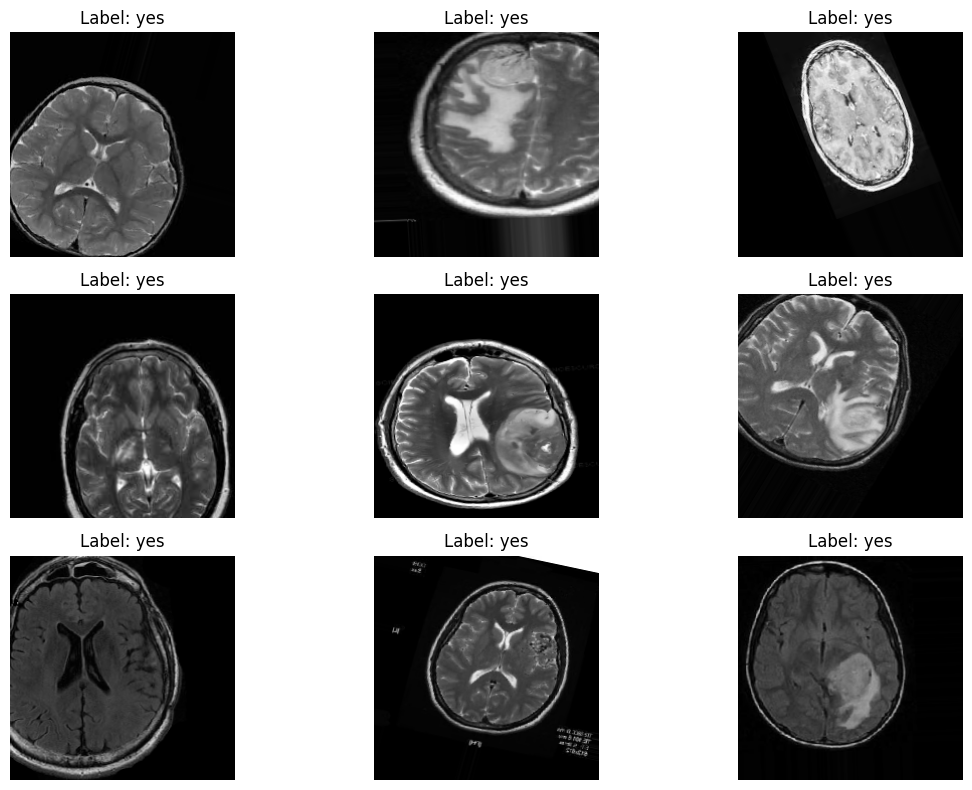

In [12]:
# Визуализация аугментаций
def visualize_augmentations(generator, category):
    # Получаем данные из генератора
    batch = next(generator)
    images, labels = batch
    plt.figure(figsize=(12, 8))
    
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {category}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Пример для категории "yes"
visualize_augmentations(train_generator, category="yes")
